# Notebook for reading and plotting data
This notebook shows some basis methods for preprocesing and plotting data with PyFloc

In [1]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import data

## Read data of a single experiment

- **file_name** (str): path of the .fcs file
- **mode** (str or int):
    - *all*: read everything
    - integer value: read as many elements as requested (choosen at random). This is useful for quick testing.

In [2]:
#E = data.Experiment(file_name = '/home/cito/flowc/Blood_2_1_037.fcs', mode = 'all')
E = data.Experiment(file_name = '/home/cito/T318/ILN_d5_A_1_1_050.fcs', mode = 'all')
print(E)

Read 376922 samples from /home/cito/T318/ILN_d5_A_1_1_050.fcs
Number of samples: 376922
Features
	0	FSC-A
	1	FSC-H
	2	FSC-W
	3	SSC-A
	4	SSC-H
	5	SSC-W
	6	FITC-A	GL7
	7	PE-A	CD138
	8	PE-CF594-A	CXCR4
	9	BB700-A	CD38
	10	PE-Cy7-A	CD95
	11	Alexa Fluor 647-A	CD73
	12	Alexa Fluor 700-A	B220
	13	APC-Cy7-A	L/D
	14	BV421-A	TACI
	15	BV510-A	IgD
	16	BV605-A	IgG1
	17	BV650-A	IgM
	18	BV711-A	F4/80
	19	BV786-A	CD80
	20	UV2-A	CD3 BUV395
	21	UV1-A	CD19 BUV737
	22	Time


## Plot data of a single experiment

- **feature_0** (str): name of the feature plotted on the x-axis
- **feature_1** (str): name of the feature plotted on the y-axis
- **stride** (int): plot one point every *stride* samples. If set to 0, the stride value for plotting a maximum of 10000 samples is automatically calculated

It is possible to modify the axis by selecting the figure and then typing:
- **X**: set log scale for x-axis<br>
- **x**: set lin scale for x-axis<br>
- **Y**: set log scale for y-axis<br>
- **y**: set lin scale for x-axis<br>

<IPython.core.display.Javascript object>


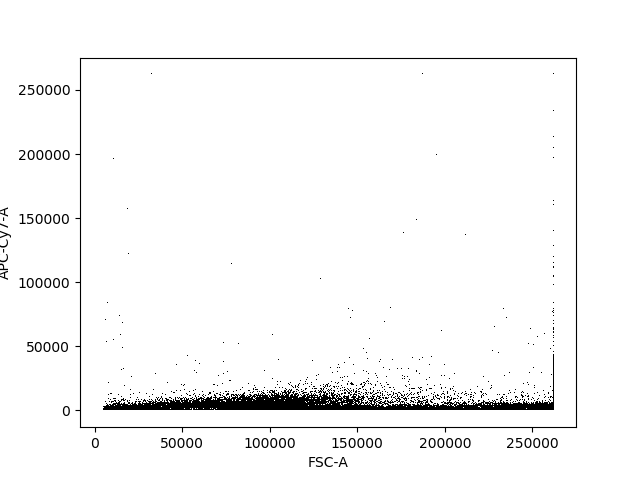

<IPython.core.display.Javascript object>


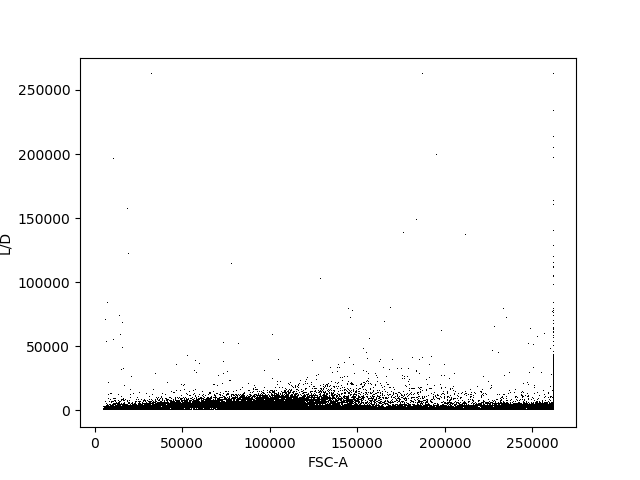

In [3]:
E.show(feature_0 = 'FSC-A', feature_1 = 'APC-Cy7-A',stride = 1)
E.show(feature_0 = 'FSC-A', feature_1 = 'L/D', stride = 1)

## Create a collection of experiments

The data structure *Collection* is the one used for all the analyses. Thus, excluding the case of simple plots described as in previous steps, it is recommended to always create a collection of experiments, even when the collection includes a single experiment.<br>

Parameters of *add_experiment*:
- **experiment** (Experiment): the experiment to add
- **condition** (str): string used to identify the condition of the experiment (e.g.: cases, controls, etc)
- **labels** (np.array): labels of the experiment, when available

In [4]:
C = data.Collection()
E1 = data.Experiment(file_name = '/home/cito/T318/ILN_d5_A_1_1_050.fcs', mode = 'all')
C.add_experiment(experiment = E1, condition = 'case')
#E2 = data.Experiment(file_name = '/home/cito/flowc/levine_13dim.fcs', mode = 'all')
#C.add_experiment(experiment = E2, condition = 'control', labels = E1.get_data_features('label'))
C.compensate()

Read 376922 samples from /home/cito/T318/ILN_d5_A_1_1_050.fcs
Running compensation for experiment 0


## Remove samples

- **features** (list): the features analyzed in this step
- **mode** (str): condition used to delete samples. Samples are deleted if any of the features listed in *features* satisfies the condition defined in *mode*. Possible choices for the mode are: 
    - *nan*: remove NaN values
    - *inf*: remove infinite values
    - *<= x*: remove values <= x, where x is a float

In [5]:
#C.clean_samples(features = ['CD4','CD8'], mode = 'nan')
C.clean_samples(features = ['IgD','BV711-A'], mode = 'nan')

## Normalize data

- **features** (list): the features used to define normalized data; <br>
- **mode** (str): method used for data normalization. Possible choices are:
    - *min*: $\ x_n = x-min(x)$
    - *min_max*: $\ x_n = (x-min(x))/(max(x)-min(x))$
    - *mean_std*: $\ x_n = (x-mean(x))/std(x)$
    - *arcsinh*: $\ x_n = sinh^{-1}(x/5)$

Running feature normalization with mode logicle
NORMALIZE_PARAMETERS  [262143.0, 5.418538265246529, 0, 2.2871992873631846, 0.5]
NORMALIZE_PARAMETERS  [252248.984375, 5.401829426321352, 0, 5.034146536884678, 1.171200451087835]


<IPython.core.display.Javascript object>


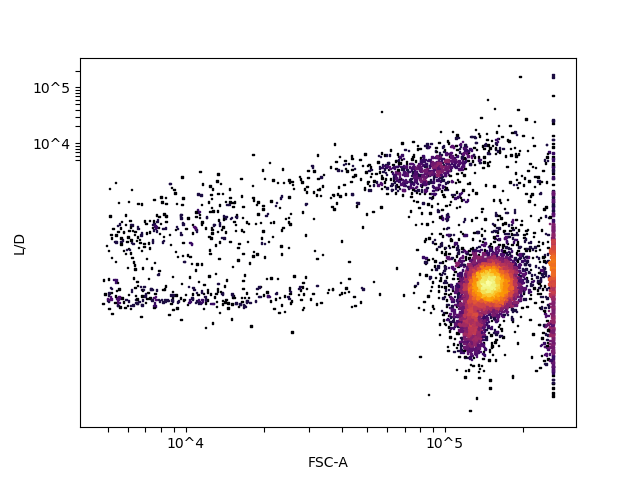

Running feature normalization with mode arcsinh


<IPython.core.display.Javascript object>


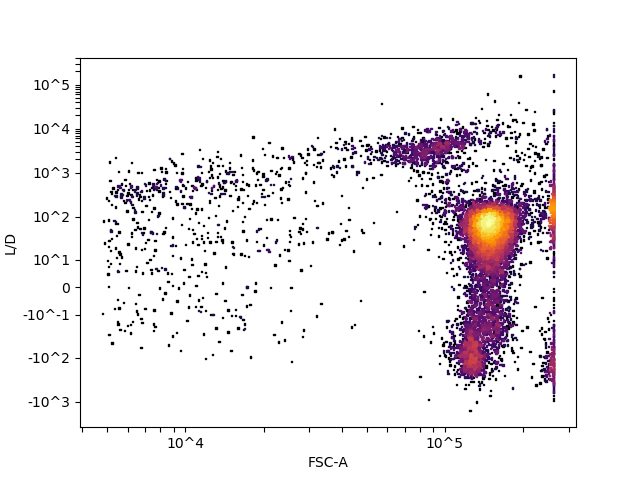

In [6]:
#C.normalize(features = ['IgD','BV711-A'], mode = 'arcsinh')
C.normalize(features = ['FSC-A','L/D'], mode = 'logicle')
C.show_scatter(['FSC-A','L/D'], mode = 'density')
C.normalize(features = ['FSC-A','L/D'], mode = 'arcsinh')
C.show_scatter(['FSC-A','L/D'], mode = 'density')

## Simple plots

This method is analogous to the one defined for the class *Experiment*, but a separate plot is produced for each *condition* included in the collection.
If normalized data are defined, each figure includes two plots: one with raw data, and one with normalized data.

<IPython.core.display.Javascript object>


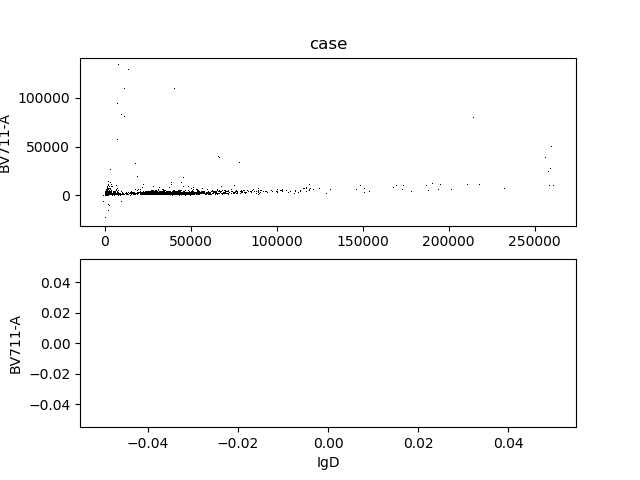

In [7]:
C.show(feature_0 = 'IgD', feature_1 = 'BV711-A', stride = 0)

## Scatter plots

Two dimensional scatter plots. It is possible to colors samples with different methods, as defined with the parameter *mode*

- **features** (list): the two features to plot
- **mode** (str): method used to color the samples. Possible choices are:
    - *experiments*: use different colors for different experiments
    - *conditions*: use different colors for different conditions
    - *labels*: use different colors for different labels. When using this method, labels needs to be defined in advande by running a clustering analysis, or manually when adding the data to the condition with the method *add_experiment*
    - *density*: estimate the density, and color samples according to the local density

<IPython.core.display.Javascript object>


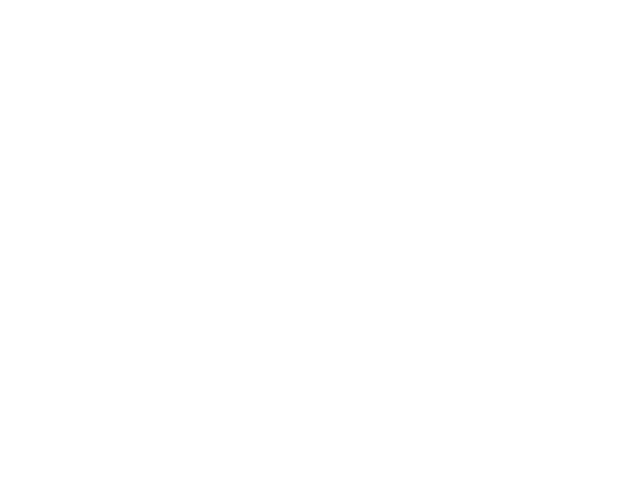

In [8]:
C.show_scatter(['IgD','BV711-A'], mode = 'density')

## Distribution plots
It plots the distribution of the features in different sub-populations. Sub-populations are defined by the attribute *labels*. Thus, this method can be used only after labels are defined. Labels can be defined mannually within the method *add_experiment*, or by running a clustering analysis

There separate figures are produced:
- phylogenetic tree of the sub-populations
- heatmaps with feature values in the subpopulations
- heatmaps with percentage occupancies of subpopulations at the different conditions

In [9]:
C.show_distributions(features = ['CD4','CD8','CD19','CD3'])